# Hawaii Climate Analysis 

In [1]:
# Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

ignore_warnings = True

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Part 1: Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy 
import sqlite3
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import insert
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [17]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [18]:
connection = engine.connect()

In [19]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

/var/folders/mp/thd95nvx4mx5cz9q4kvwptn40000gn/T/ipykernel_2104/1652790876.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect=True)


In [20]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Part 2: Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
recent_date_tuple = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date_tuple

('2017-08-23',)

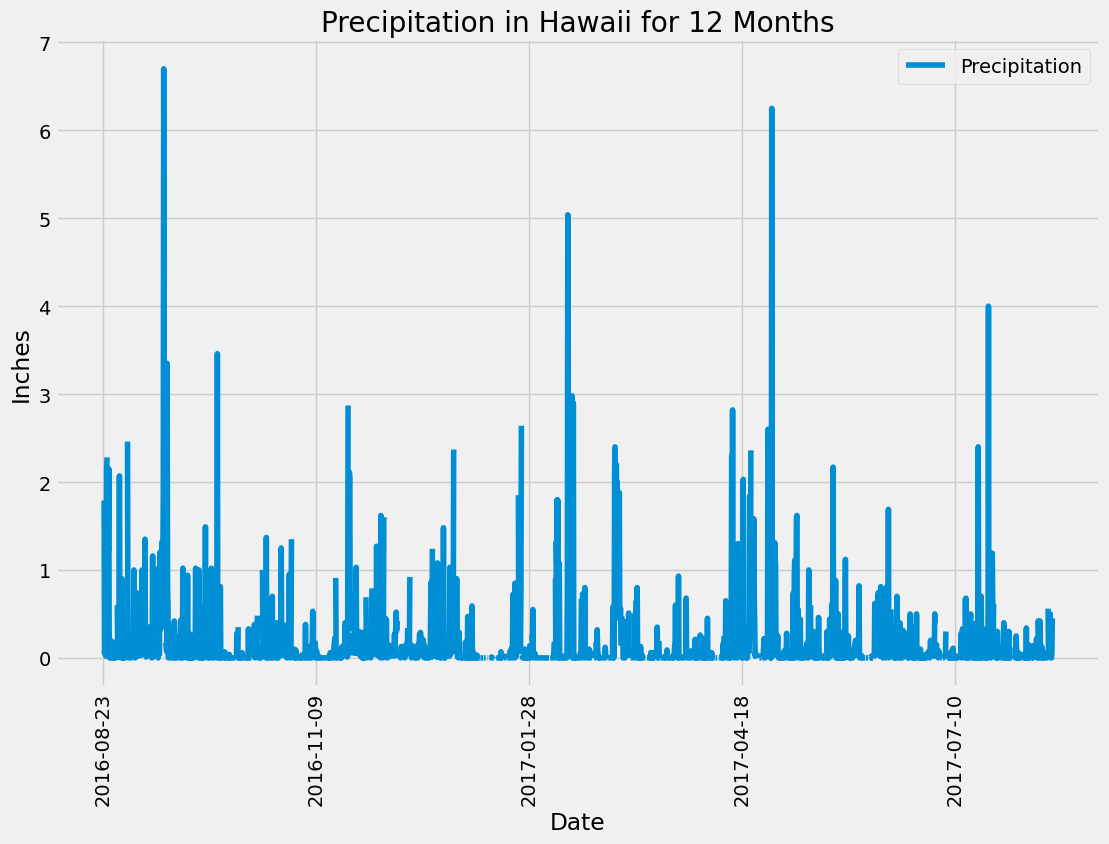

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = recent_date_tuple[0]

if isinstance(recent_date, str): #ensure date is in datetime format
    recent_date = dt.datetime.strptime(recent_date,'%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
year_ago = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp)\
    .filter(measurement.date >= year_ago)\
        .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='Date', y='Precipitation', figsize= (12,8), rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation in Hawaii for 12 Months')

# Save the plot
plt.savefig('../Images/precipitation.png')
plt.show()

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Part 3: Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.id).count()
station_count

9

In [46]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station)\
        .order_by(func.count(measurement.station).desc())\
            .all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

#### Question: which station id has the greatest number of observations?
* The station that had the greatest number of observations is USC00519281. 

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]

most_active_station_temps = session.query(func.min(measurement.tobs), 
                                          func.max(measurement.tobs), 
                                          func.avg(measurement.tobs))\
    .filter(measurement.station == most_active_station)\
        .all()
most_active_station_temps

print(f"The lowest temperature recorded at station {most_active_station} is {most_active_station_temps[0][0]} degrees Fahrenheit.")
print(f"The highest temperature recorded at station {most_active_station} is {most_active_station_temps[0][1]} degrees Fahrenheit.")
print(f"The average temperature recorded at station {most_active_station} is {round(most_active_station_temps[0][2], 2)} degrees Fahrenheit.")


The lowest temperature recorded at station USC00519281 is 54.0 degrees Fahrenheit.
The highest temperature recorded at station USC00519281 is 85.0 degrees Fahrenheit.
The average temperature recorded at station USC00519281 is 71.66 degrees Fahrenheit.


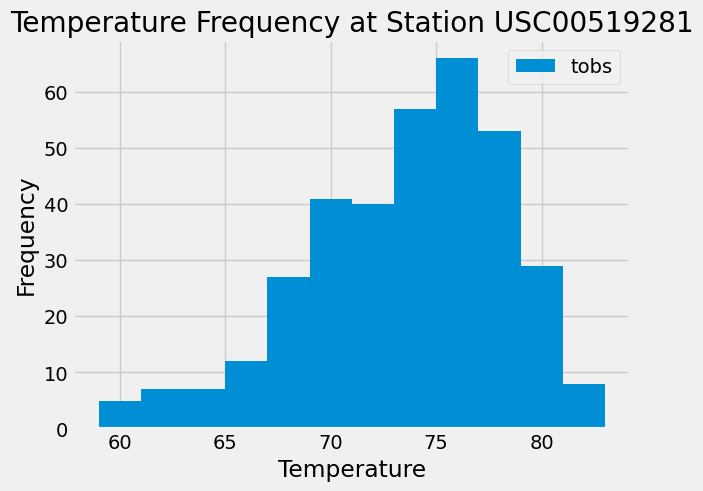

In [57]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station.
most_active_station_data = session.query(measurement.tobs)\
    .filter(measurement.date >= year_ago)\
        .filter(measurement.station == most_active_station)\
            .all()

# Plot as a histogram
most_active_station_df = pd.DataFrame(most_active_station_data, columns=['tobs'])
most_active_station_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature Frequency at Station {most_active_station}')

# Save the plot
plt.savefig('../Images/most_act_temperature_frequency.png')
plt.show()


# Close Session

In [55]:
# Close Session
session.close()

#### Resources: Data given by _edx Boot Camps LLC_ and is intended for educational purposes only.